# Linear Regression in R workshop

## Assumptions of Linear Regression
1. Linear relationship. (will test with scatter plots)
1. Multivariate normality. (will check skewness and kurtosis)
1. No or little multicollinearity. (predictors can not be overly correlated)
1. No auto-correlation. (not time series or related samples)
1. Homoscedasticity. (will test)

## Install packages

In [1]:
install.packages("car")
install.packages("caret")
install.packages("gvlma")
install.packages("predictmeans")
install.packages("e1071")
install.packages("lmtest")


The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpoV4fUj/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpoV4fUj/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpoV4fUj/downloaded_packages


also installing the dependency ‘lmeInfo’





The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpoV4fUj/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpoV4fUj/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpoV4fUj/downloaded_packages


## Load packages

In [2]:
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("lmtest")

Loading required package: carData

Loading required package: ggplot2

Loading required package: lattice

Loading required package: lme4

Loading required package: Matrix

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:lme4’:

    lmList


Loading required package: lmeInfo

Loading required package: parallel

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




## Predict happiness

In [4]:
# read in data
WorldHappiness = read.csv("../../Data/worldHappiness.csv")

In [ ]:
# view data
head(WorldHappiness)

,Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


### Testing Assumptions

#### Test for Linearity

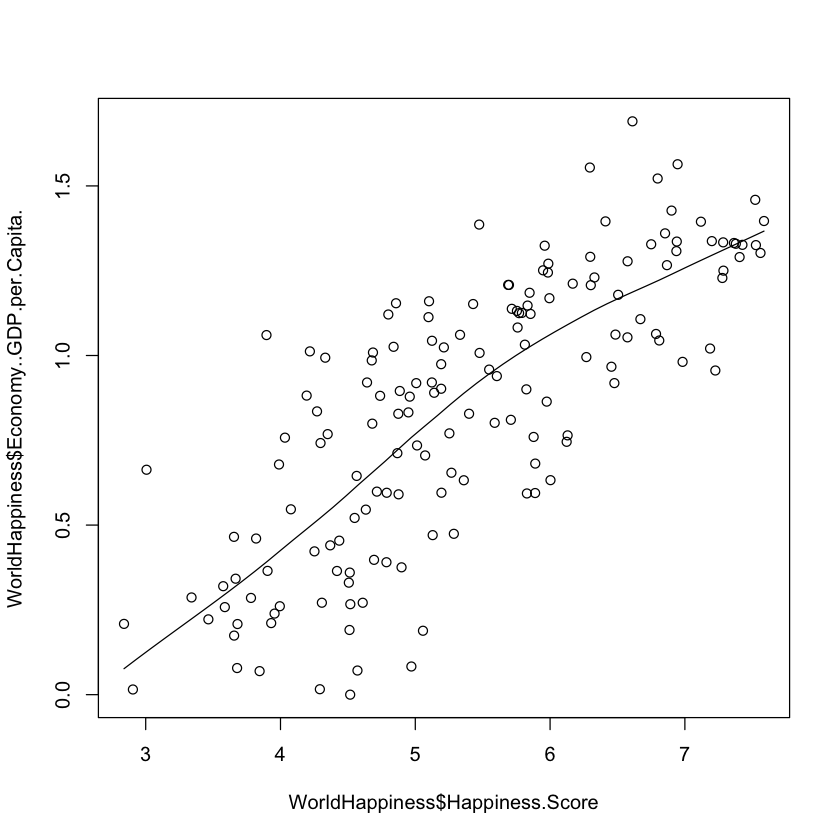

In [36]:
scatter.smooth(x=WorldHappiness$Happiness.Score, y=WorldHappiness$Economy..GDP.per.Capita.)

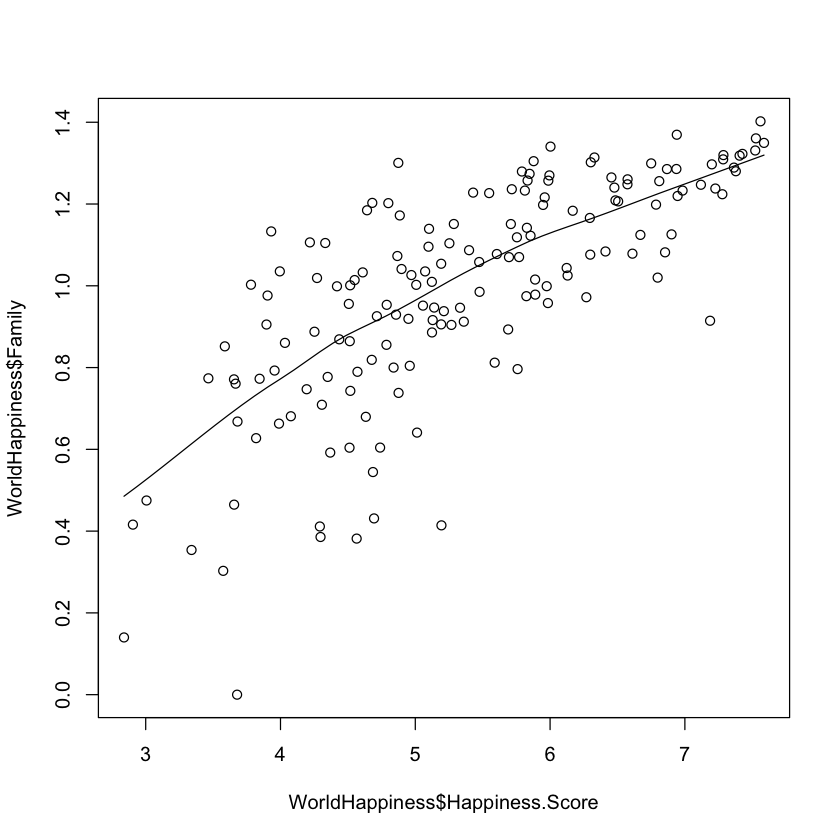

In [6]:
scatter.smooth(x=WorldHappiness$Happiness.Score, y=WorldHappiness$Family)

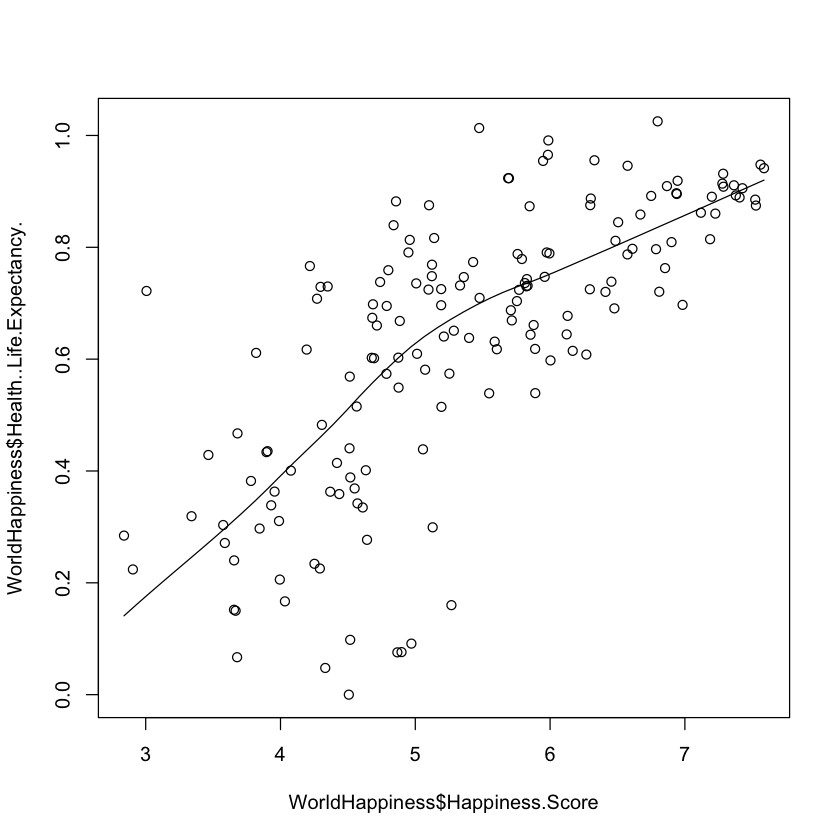

In [7]:
scatter.smooth(x=WorldHappiness$Happiness.Score, y=WorldHappiness$Health..Life.Expectancy.)

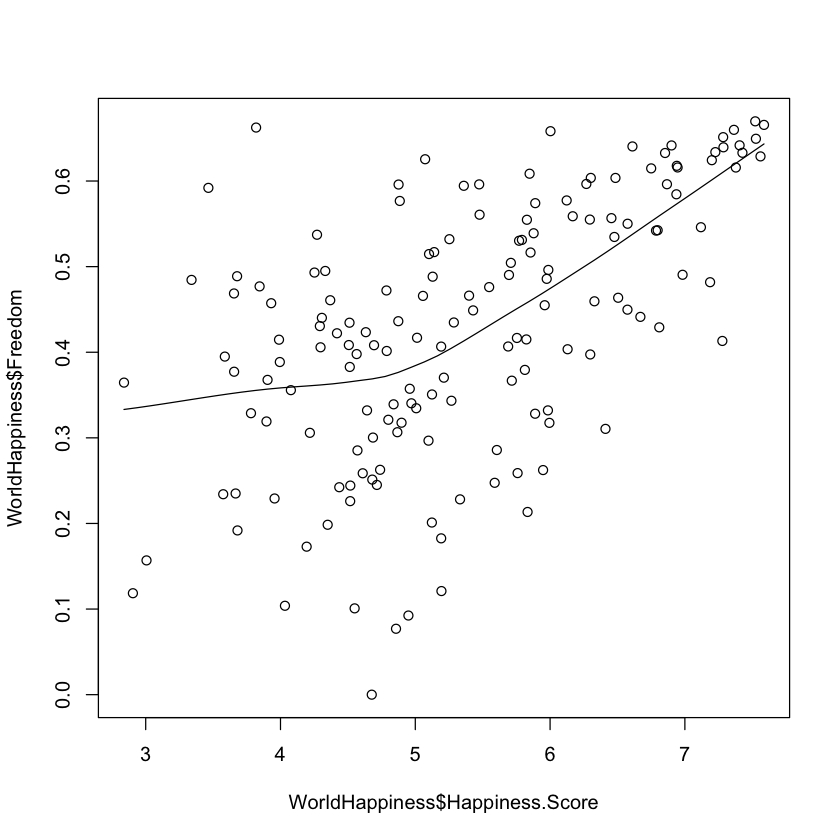

In [9]:
scatter.smooth(x=WorldHappiness$Happiness.Score, y=WorldHappiness$Freedom)

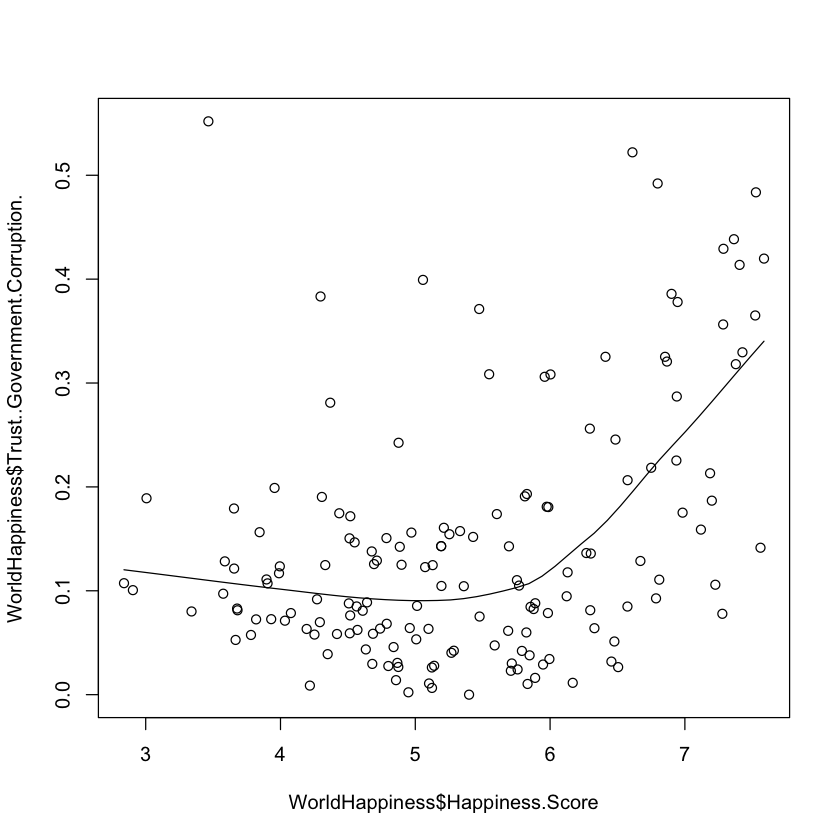

In [13]:
scatter.smooth(x=WorldHappiness$Happiness.Score, y=WorldHappiness$Trust..Government.Corruption.)

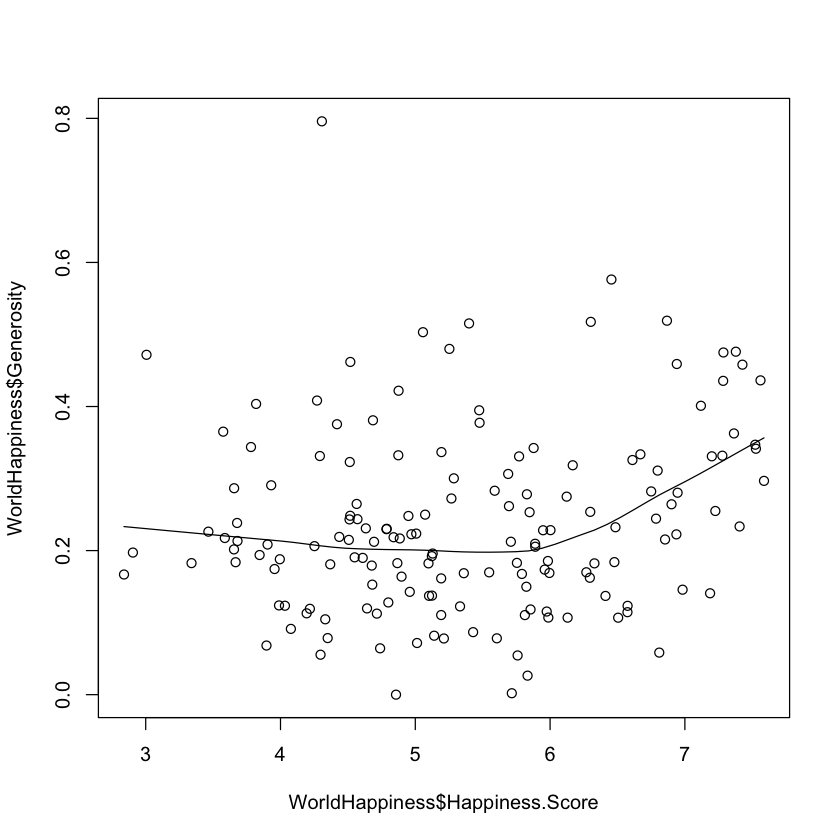

In [14]:
scatter.smooth(x=WorldHappiness$Happiness.Score, y=WorldHappiness$Generosity)

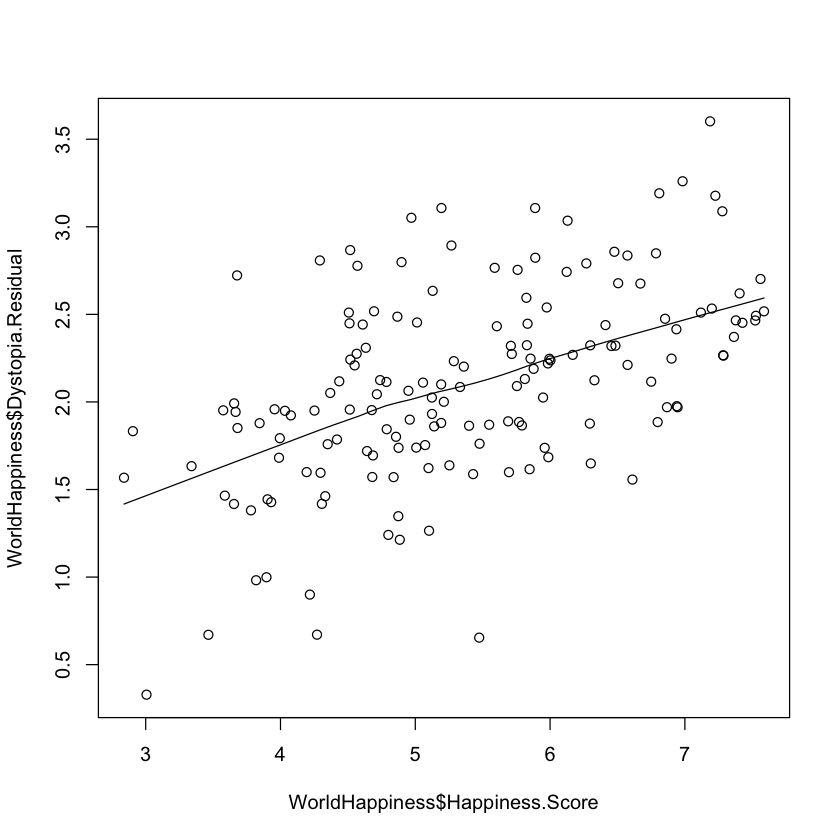

In [15]:
scatter.smooth(x=WorldHappiness$Happiness.Score, y=WorldHappiness$Dystopia.Residual)

## Choose some linearly related variables: Economy, Generosity

### Check for multicollinearity

In [40]:
cor(WorldHappiness$Economy..GDP.per.Capita., WorldHappiness$Generosity)

[1] -0.01046544

### Predictors are not strongly correlated

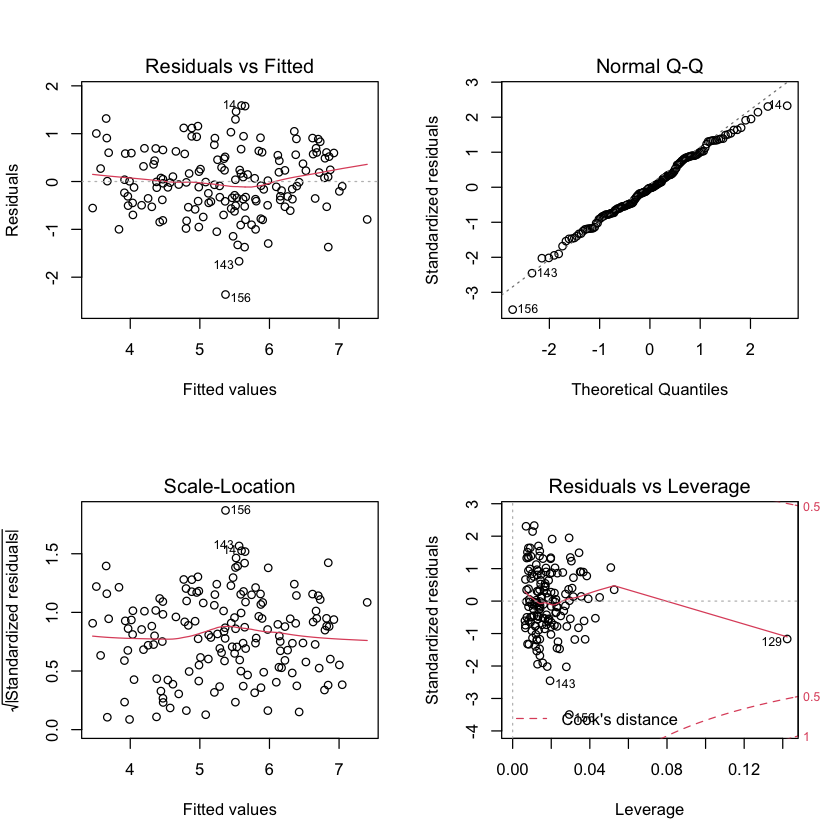

In [33]:
### Homoscedasticity
lmMod <- lm(Happiness.Score~Economy..GDP.per.Capita. + Generosity, data=WorldHappiness)
par(mfrow=c(2,2))
plot(lmMod)

## Shows approximately straight across for 2/3, but the other one isn't - you may have an outlier issue- but you'll get to that later

In [20]:
lmtest::bptest(lmMod)


	studentized Breusch-Pagan test

data:  lmMod
BP = 0.30467, df = 2, p-value = 0.8587


#### You want it to be nonsignificant, and it is, so you're good to go!

In [22]:
### Homogeneity of Variance
#### Good on that too per the plot, try the assumption library
gvlma(lmMod)


Call:
lm(formula = Happiness.Score ~ Economy..GDP.per.Capita. + Generosity, 
    data = WorldHappiness)

Coefficients:
             (Intercept)  Economy..GDP.per.Capita.                Generosity  
                   3.090                     2.224                     1.704  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmMod) 

                    Value p-value                Decision
Global Stat        3.8091 0.43246 Assumptions acceptable.
Skewness           0.5460 0.45994 Assumptions acceptable.
Kurtosis           0.1962 0.65779 Assumptions acceptable.
Link Function      2.7563 0.09687 Assumptions acceptable.
Heteroscedasticity 0.3106 0.57732 Assumptions acceptable.

#### All assumpons acceptable. Wahoo!

In [37]:
### Screening for Outliers
CookD(lmMod, group=NULL, plot=TRUE, idn=3, newwd=TRUE)

#### Outliers on row 129, 143, and 156

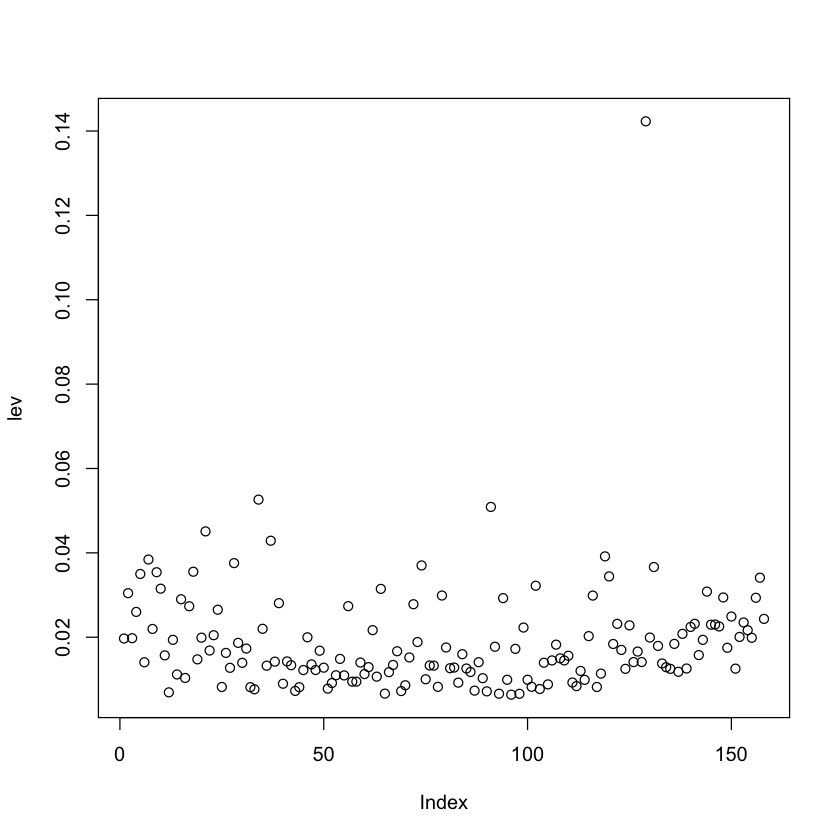

In [28]:
lev = hat(model.matrix(lmMod))
plot(lev)

In [27]:
car::outlierTest(lmMod)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferroni p
156 -3.629181         0.00038632     0.061038

#### We have at least one outlier, the one that is 3 standard deviaons away plus is row 156 (already showed on the other graph)

In [30]:
summary(influence.measures(lmMod))
#### Lots are outliers, but none in x and y space

Potentially influential observations of
	 lm(formula = Happiness.Score ~ Economy..GDP.per.Capita. + Generosity,      data = WorldHappiness) :

    dfb.1_ dfb.E..G dfb.Gnrs dffit   cov.r   cook.d hat    
12   0.01   0.05     0.03     0.20    0.92_*  0.01   0.01  
14   0.10   0.08    -0.14     0.25    0.93_*  0.02   0.01  
16   0.10   0.06    -0.13     0.22    0.94_*  0.02   0.01  
21  -0.02   0.01     0.02     0.02    1.07_*  0.00   0.05  
34  -0.04   0.01     0.08     0.08    1.07_*  0.00   0.05  
37   0.07  -0.04    -0.10    -0.11    1.06_*  0.00   0.04  
119  0.00  -0.01     0.01     0.01    1.06_*  0.00   0.04  
129  0.15   0.14    -0.44    -0.48_*  1.16_*  0.08   0.14_*
143 -0.16  -0.10     0.27    -0.35    0.92_*  0.04   0.02  
156  0.15   0.13    -0.54    -0.63_*  0.82_*  0.12   0.03  


In [31]:
### Run the Model
summary(lmMod)


Call:
lm(formula = Happiness.Score ~ Economy..GDP.per.Capita. + Generosity, 
    data = WorldHappiness)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36245 -0.43946 -0.01671  0.54241  1.58794 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.0898     0.1642  18.816  < 2e-16 ***
Economy..GDP.per.Capita.   2.2238     0.1359  16.369  < 2e-16 ***
Generosity                 1.7038     0.4323   3.941 0.000122 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6862 on 155 degrees of freedom
Multiple R-squared:  0.6454,	Adjusted R-squared:  0.6409 
F-statistic: 141.1 on 2 and 155 DF,  p-value: < 2.2e-16
